In [1]:
def getCountOfLinks(body):
    internalUrls = []
    internaltoSEUrls = []
    externalUrls = []
    urls = extractor.find_urls(body)
    for i in range(0,len(urls)):
        if("stackoverflow" in urls[i].lower()):
            internalUrls.append(urls[i].lower())
        elif("stackexchange" in urls[i].lower()):
            internaltoSEUrls.append(urls[i].lower())
        else:
            externalUrls.append(urls[i].lower())
    return [internalUrls, internaltoSEUrls, externalUrls]

In [2]:
from urllib.parse import urlparse
def getDomainsOfExternalLinks(externalUrls):
    domainDict = {}
    for i in range(0, len(externalUrls)):
        if not (externalUrls[i].startswith('//') or externalUrls[i].startswith('http://') or externalUrls[i].startswith('https://')):
            externalUrls[i] = '//' + externalUrls[i]
        domain = urlparse(externalUrls[i]).netloc
        domain = domain.lower()
        if domain in domainDict.keys(): 
            existingCount = domainDict[domain] + 1
            domainDict.update({domain: existingCount})
        else: 
            domainDict[domain] = 1
    return domainDict

In [3]:
import re
from urlextract import URLExtract
import pandas as pd
import numpy as np

data_iterator = pd.read_csv("../example/Posts_500000.csv")
linksInQuesCount = 0
linksInAnsCount = 0
extractor = URLExtract()
internalUrlsInQues = []
externalUrlsInQues = []
internaltoSEUrlsInQues = []
internalUrlsInAns = []
externalUrlsInAns = []
internaltoSEUrlsInAns = []
ques = data_iterator[data_iterator['PostTypeId'] == 1]
ans = data_iterator[data_iterator['PostTypeId'] == 2]
for i in ques.index:
    list1 = getCountOfLinks(ques['Body'][i])
    internalUrlsInQues += list1[0]
    internaltoSEUrlsInQues += list1[1]
    externalUrlsInQues += list1[2]
for i in ans.index:
    list2 = getCountOfLinks(ans['Body'][i])
    internalUrlsInAns += list2[0]
    internaltoSEUrlsInAns += list2[1]
    externalUrlsInAns += list2[2]

internalUrlsInQues = list(filter(None, internalUrlsInQues))
internaltoSEUrlsInQues = list(filter(None, internaltoSEUrlsInQues))
externalUrlsInQues = list(filter(None, externalUrlsInQues))
linksInQuesCount = len(internalUrlsInQues) + len(internaltoSEUrlsInQues) + len(externalUrlsInQues)

internalUrlsInAns = list(filter(None, internalUrlsInAns))
internaltoSEUrlsInAns = list(filter(None, internaltoSEUrlsInAns))
externalUrlsInAns = list(filter(None, externalUrlsInAns))
linksInAnsCount = len(internalUrlsInAns) + len(internaltoSEUrlsInAns) + len(externalUrlsInAns)


In [4]:
comments = pd.read_csv("../example/Comments.csv")
linksInCommentsCount = 0
internalUrlsInComments = []
externalUrlsInComments = []
internaltoSEUrlsInComments = []
for i in comments.index:
    body = comments['Text'][i]
    try:
        urls = extractor.find_urls(str(body))
        for i in range(0,len(urls)):
            if("stackoverflow" in urls[i]):
                internalUrlsInComments.append(urls[i])
            elif("stackexchange" in urls[i]):
                internaltoSEUrlsInComments.append(urls[i])
            else:
                externalUrlsInComments.append(urls[i])
    except Exception:
        continue
internalUrlsInComments = list(filter(None, internalUrlsInComments))
internaltoSEUrlsInComments = list(filter(None, internaltoSEUrlsInComments))
externalUrlsInComments = list(filter(None, externalUrlsInComments))

linksInCommentsCount = len(internalUrlsInComments) + len(internaltoSEUrlsInComments) + len(externalUrlsInComments)

Text(0.5, 0, 'Links in Comments')

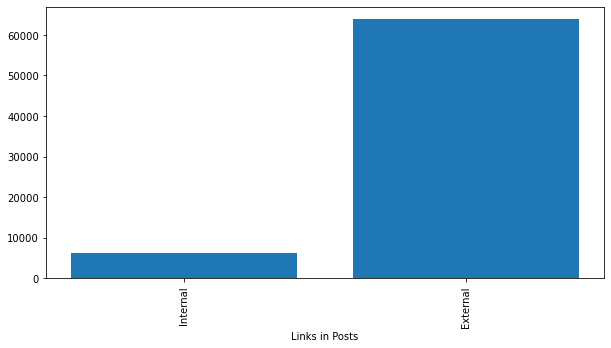

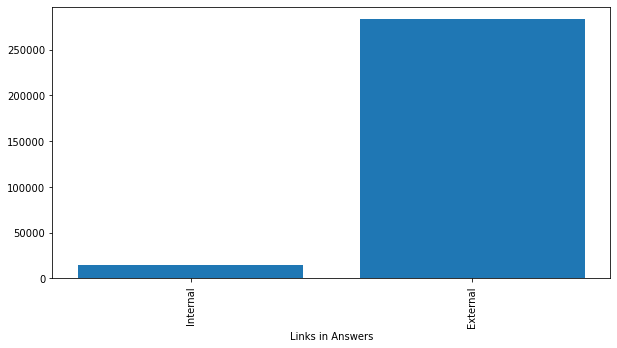

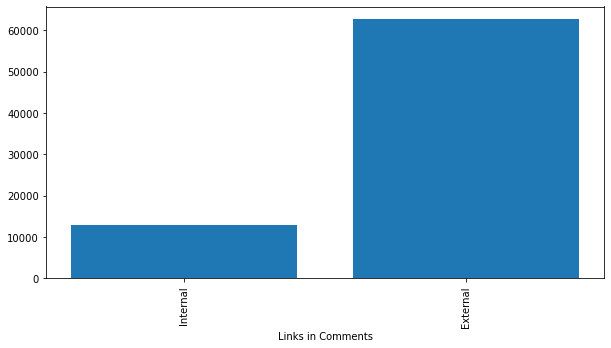

In [5]:
import matplotlib.pyplot as plt
#Bar graph for categories
#As internalToSEUrls are insignificant, they are not considered for the bar graph
keys = ['Internal', 'External']
values = [len(internalUrlsInQues), len(externalUrlsInQues)]
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.xlabel('Links in Posts')

values = [len(internalUrlsInAns), len(externalUrlsInAns)]
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.xlabel('Links in Answers')

values = [len(internalUrlsInComments), len(externalUrlsInComments)]
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)
plt.xlabel('Links in Comments')

<BarContainer object of 20 artists>

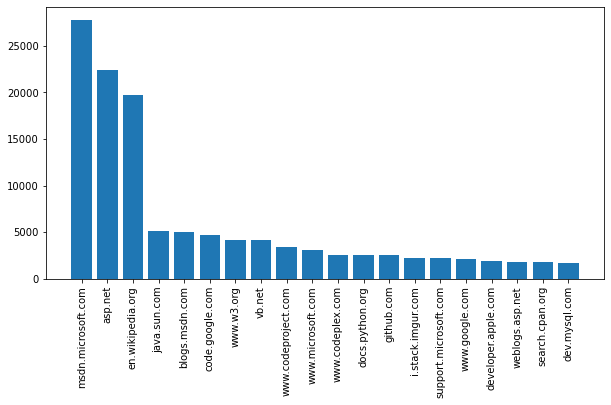

In [6]:
totalExternalLinks = []
for i in range(0, len(externalUrlsInQues)):
    totalExternalLinks.append(externalUrlsInQues[i])
for i in range(0, len(externalUrlsInAns)):
    totalExternalLinks.append(externalUrlsInAns[i])
for i in range(0, len(externalUrlsInComments)):
    totalExternalLinks.append(externalUrlsInComments[i])

domainDict = getDomainsOfExternalLinks(totalExternalLinks)

top20Domains= dict(sorted(domainDict.items(), key = lambda item: item[1], reverse=True)[:20])

#Bar graph of top 20 domains in external links
keys = top20Domains.keys()
values = top20Domains.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.bar(keys, values)

([<matplotlib.patches.Wedge at 0x20a045ed610>,
 [Text(0.9679634613732602, 0.5225387425314006, 'Posts'),
  Text(-1.0990939516959308, 0.0446372640898048, 'Ans'),
  Text(0.9459618963731631, -0.5613876473615084, 'Comments')],
 [Text(0.52798006983996, 0.2850211322898549, '15.8%'),
  Text(-0.5995057918341441, 0.02434759859443898, '67.2%'),
  Text(0.5159792162035435, -0.3062114440153682, '17.0%')])

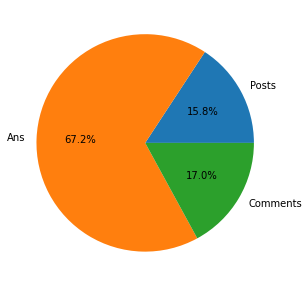

In [7]:
#Logic to get percent of links in questions, answers and comments
total = linksInQuesCount + linksInAnsCount + linksInCommentsCount
dictOfPercen = {'Posts' : (linksInQuesCount/total)*100,
              'Ans' : (linksInAnsCount/total)*100,
              'Comments' : (linksInCommentsCount/total)*100}
keys = dictOfPercen.keys()
values = dictOfPercen.values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.pie(values,  labels = keys, autopct='%1.1f%%',)